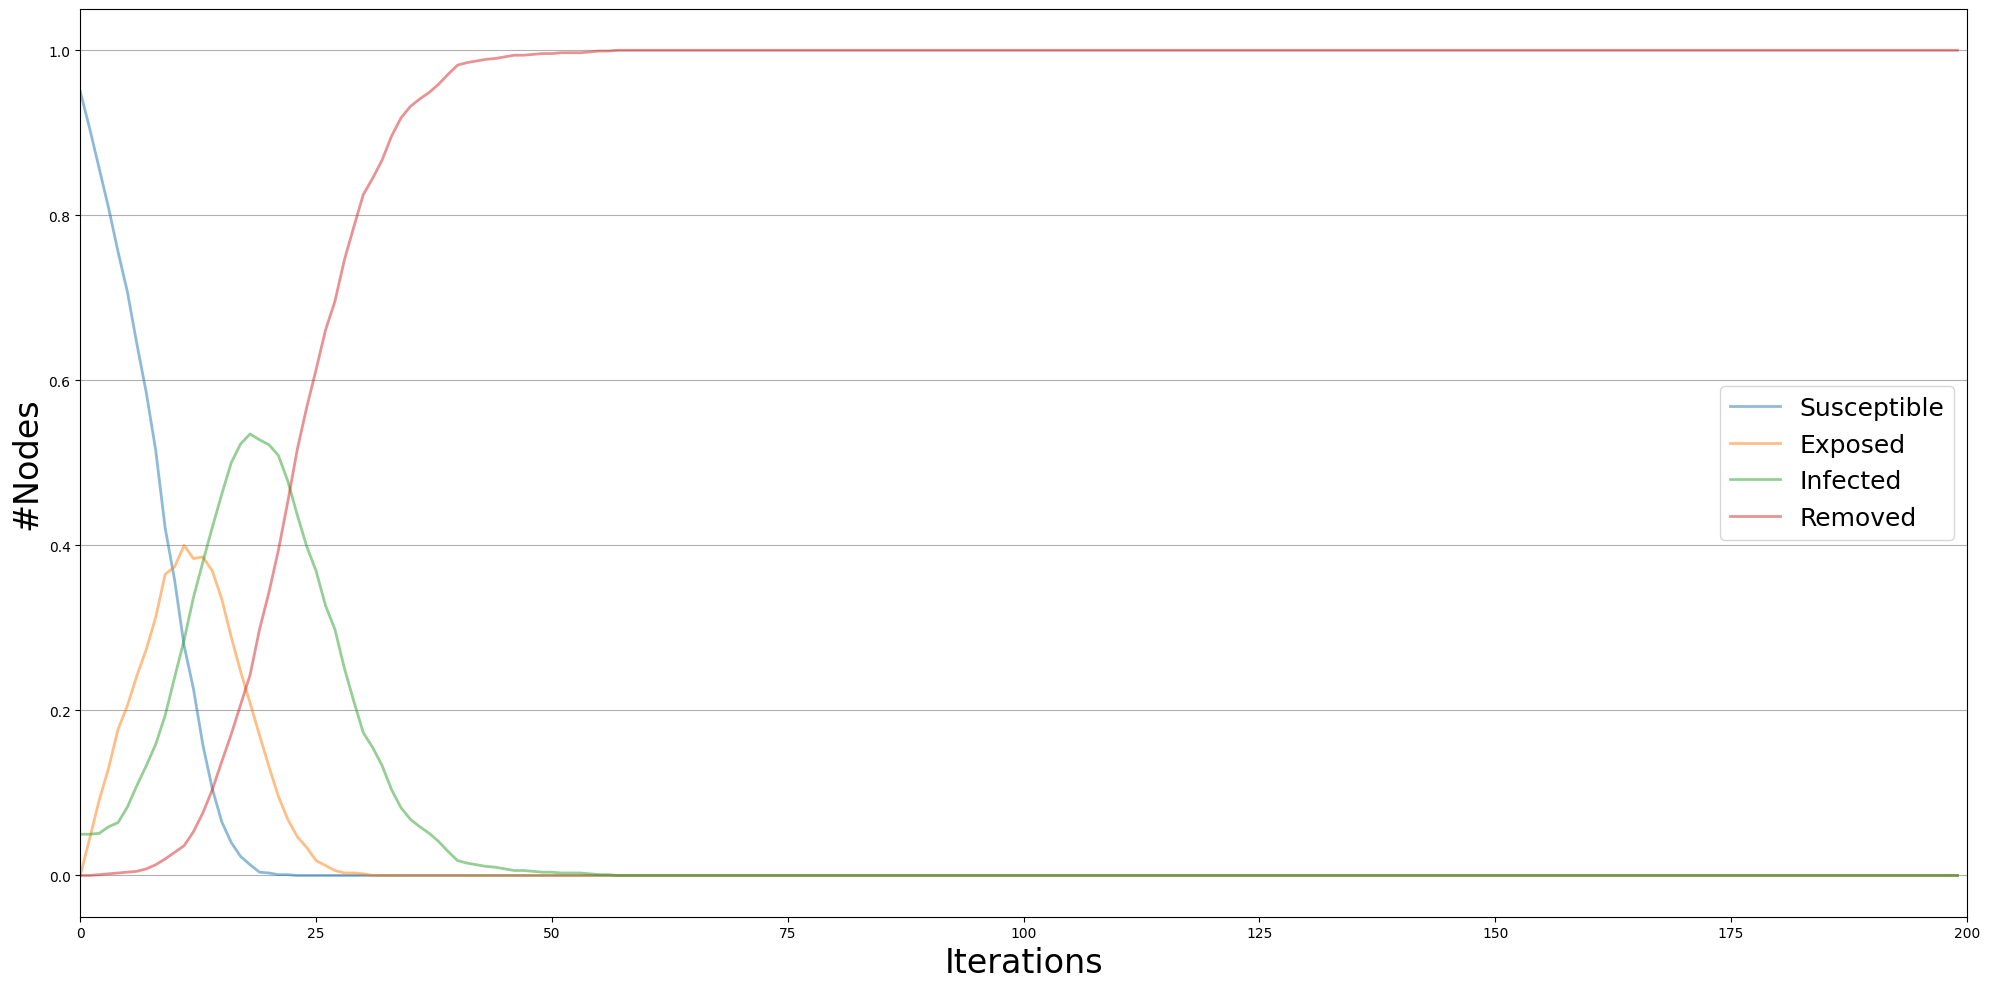

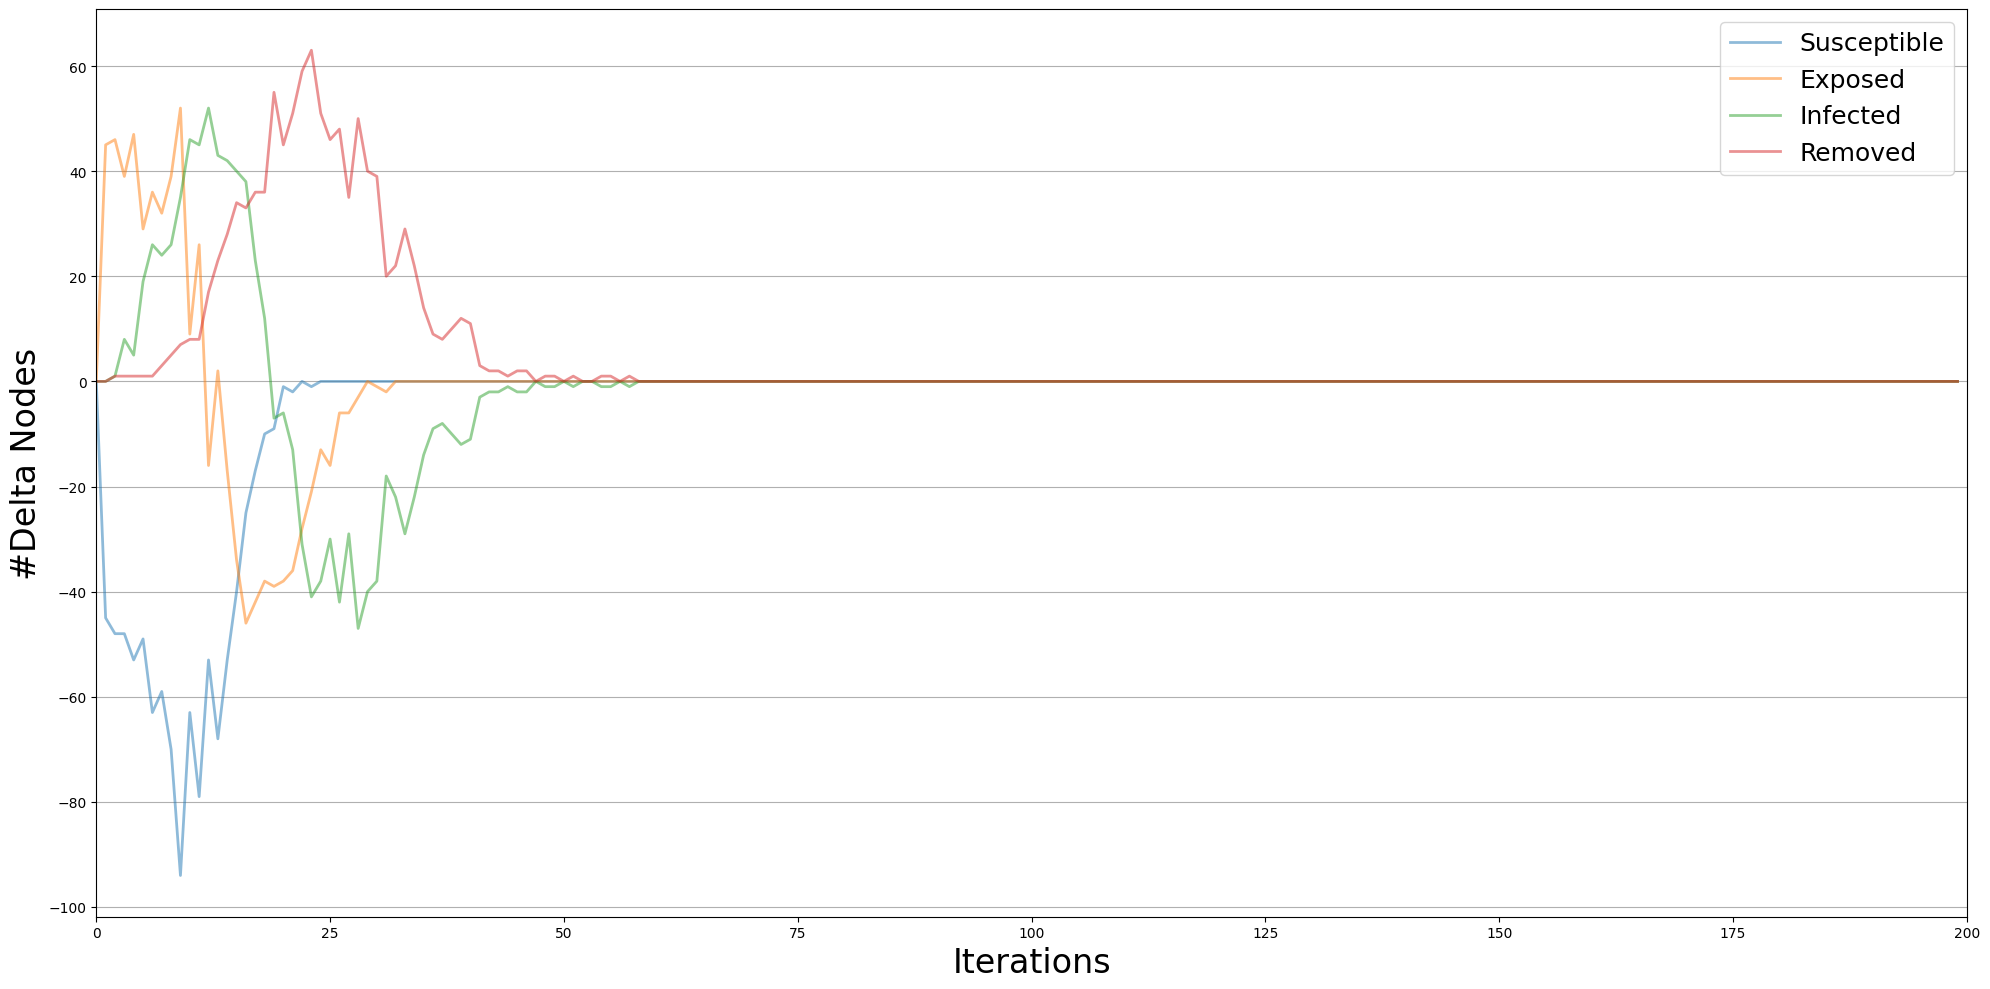

In [5]:
'''
SEIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected after an exposition period with probability beta, than it can switch to removed with probability gamma (the only transition allowed are S→E→I→R).

This implementation assumes continuous time dynamics for the E->I and I->R transitions.

Statuses/Codes:
    - S: Susceptible | 0
    - E: Exposed | 1
    - I: Infected | 2
    - R: Removed | 3

Parameters:
    - beta: infection probability (float in [0,1])
    - gamma: recovery probability (float in [0,1]) 
    - alpha: incubation period (float in [0,1])
    
Notes:
    - quanto è il tempo di esposizione?
    - differenza tra dynamic e continuous time?
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SEIRctModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01) # infection rate 1%
config.add_model_parameter('gamma', 0.005) # recovery rate 0.5%   
config.add_model_parameter('alpha', 0.05) # incubation rate 5% (20 iterations)
config.add_model_parameter("fraction_infected", 0.05) # initial fraction of infected nodes 5%
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

viz = DiffusionPrevalence(model, trends)
viz.plot()